# Estatística com Statsmodels

In [16]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Leitura da Base de Dados

In [17]:
# prompt: Faça a conexão com o drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/MyDrive/2-Estudos/2-Qualificação Profissional/2-Cursos em Andamento com certificado/Python Para Análise de Dados e Data Science/Cap14 - Statsmodels/3-Cap14/dataset.csv')

In [20]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [21]:
df.shape

(3000, 7)

In [22]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


# Análise Exploratória

### Verificando valores ausentes

In [24]:
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [25]:
df.isna().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

### Estatatística Descritiva

In [26]:
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [27]:
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

### Gráficos

<Axes: xlabel='valor_aluguel', ylabel='Count'>

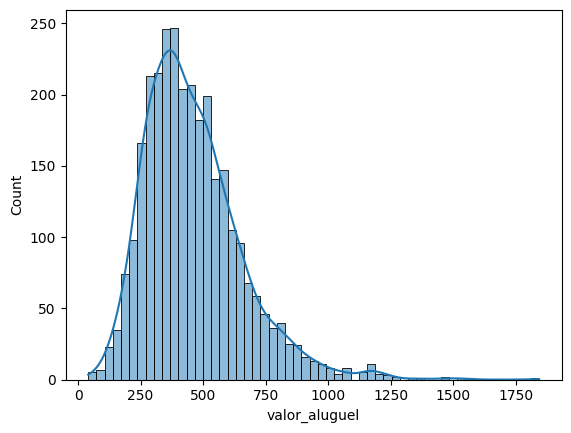

In [28]:
sns.histplot(data = df, x = 'valor_aluguel', kde = True)

In [30]:
df['log_valor_aluguel'] = np.log(df.valor_aluguel)

<Axes: xlabel='log_valor_aluguel', ylabel='Count'>

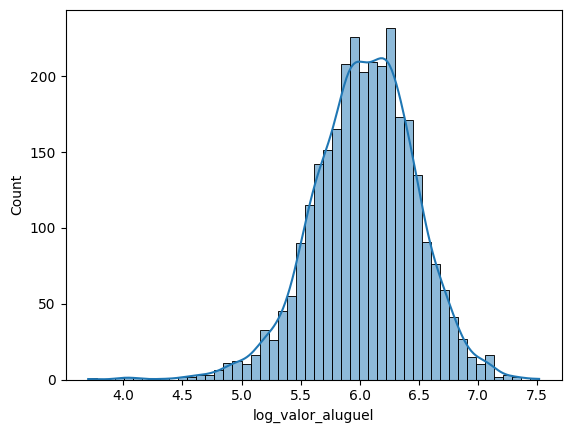

In [31]:
sns.histplot(data = df, x = 'log_valor_aluguel', kde = True)

### Análise Bivariada

In [34]:
df[['valor_aluguel', 'log_valor_aluguel', 'area_m2']].corr()

,valor_aluguel,log_valor_aluguel,area_m2
valor_aluguel,1.000000,0.948111,0.584878
log_valor_aluguel,0.948111,1.000000,0.547118
area_m2,0.584878,0.547118,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

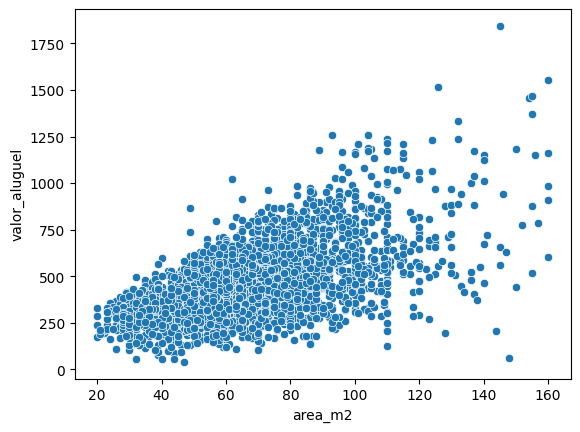

In [33]:
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel')

<Axes: xlabel='area_m2', ylabel='log_valor_aluguel'>

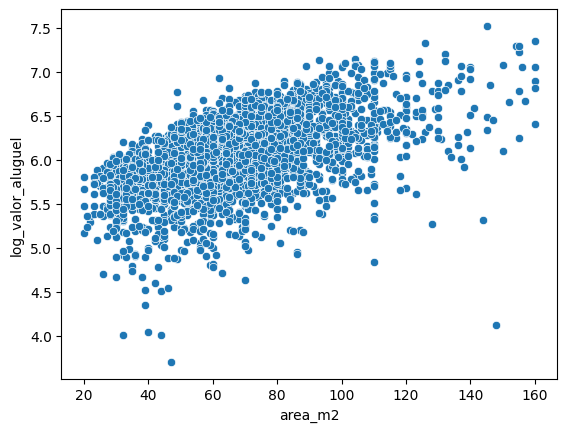

In [36]:
sns.scatterplot(data = df, y = 'log_valor_aluguel', x = 'area_m2')

In [37]:
df['log_area_m2'] = np.log(df.area_m2)

<Axes: xlabel='log_area_m2', ylabel='log_valor_aluguel'>

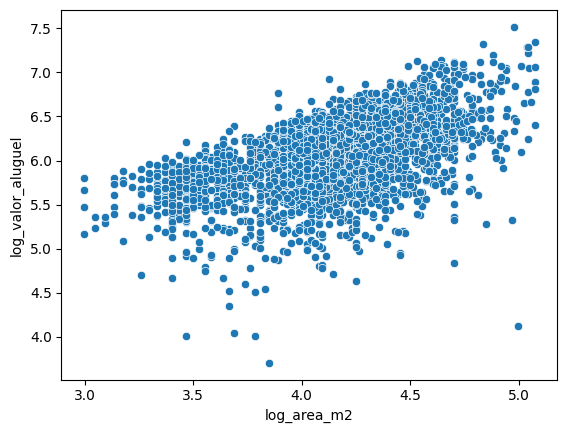

In [38]:
sns.scatterplot(data = df, x = 'log_area_m2',  y = 'log_valor_aluguel')

### Regressão Linear Simples

In [39]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro,log_valor_aluguel,log_area_m2
0,120.97436,35,1939,1,0,0,1112,4.795579,3.555348
1,436.97433,104,1939,1,1,0,1112,6.079874,4.644391
2,355.74360,29,1971,2,0,0,2114,5.874210,3.367296
3,282.92310,39,1972,2,0,0,2148,5.645175,3.663562
4,807.23080,97,1985,1,0,0,2222,6.693610,4.574711


In [41]:
# Definindo a variável dependente
y = df['valor_aluguel']

In [42]:
# Definindo a variável independente
X = df['area_m2']

In [43]:
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(X)

In [44]:
# Criamos o modelo
modelo = sm.OLS(y, X)

In [46]:
# Treinando o modelo
resultado = modelo.fit()

In [47]:
# Resultado
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          6.84e-275
Time:                        23:29:03   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

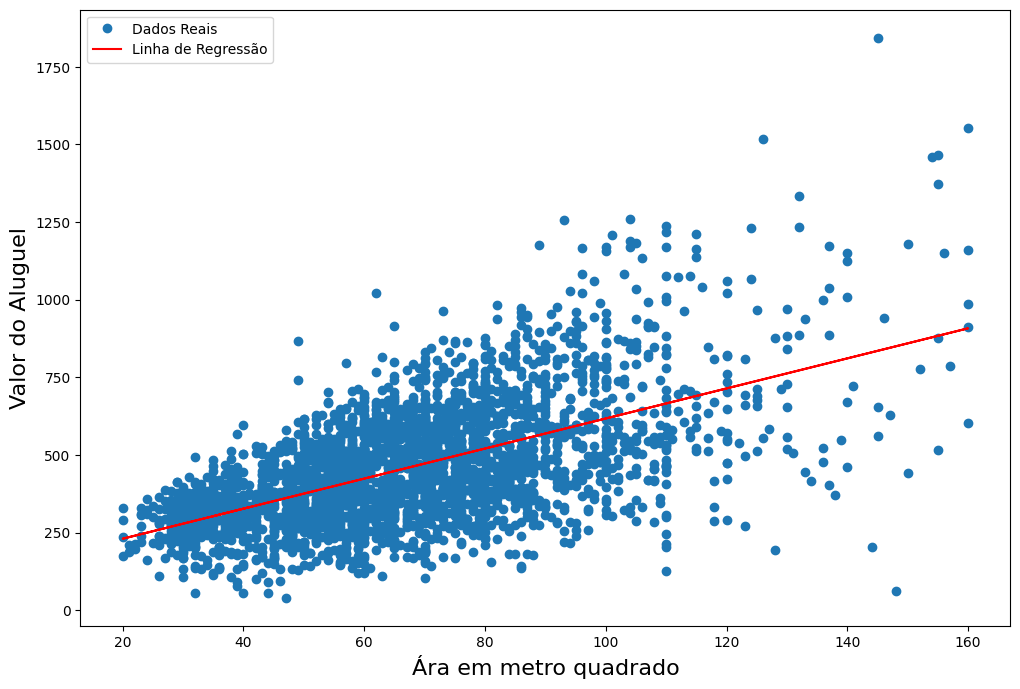

In [50]:
# Gráfico de Disperção
plt.figure(figsize = (12, 8))
plt.xlabel('Ára em metro quadrado', size = 16)
plt.ylabel('Valor do Aluguel', size = 16)
plt.plot(X['area_m2'], y, 'o', label = 'Dados Reais')
plt.plot(X['area_m2'], resultado.fittedvalues, 'r-', label = 'Linha de Regressão')
plt.legend(loc = 'best')